# Data Visualization using Python

### This notebook is for part of assessment for IBM Data Science Professional Certification.


I do not own any rights of data or the source. This is purely for educational purpose.
-Gawtam Bhat

About the data and source: 

A survey was conducted to gauge an audience interest in different data science topics, namely:

Big Data (Spark / Hadoop)
Data Analysis / Statistics
Data Journalism
Data Visualization
Deep Learning
Machine Learning
The participants had three options for each topic: Very Interested, Somewhat interested, and Not interested. 2,233 respondents completed the survey.

The survey results have been saved in a csv file and can be accessed through this link: https://cocl.us/datascience_survey_data.

#### 1) First we will import the data using Pandas and then display the data frame we created

In [13]:
import pandas as pd

df= pd.read_csv("https://cocl.us/datascience_survey_data", index_col = 0)
df

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136
Machine Learning,1629,477,74




####  2) Use the artist layer of Matplotlib to Visualize the percentage of the respondents' interest in the different data science topics surveyed.


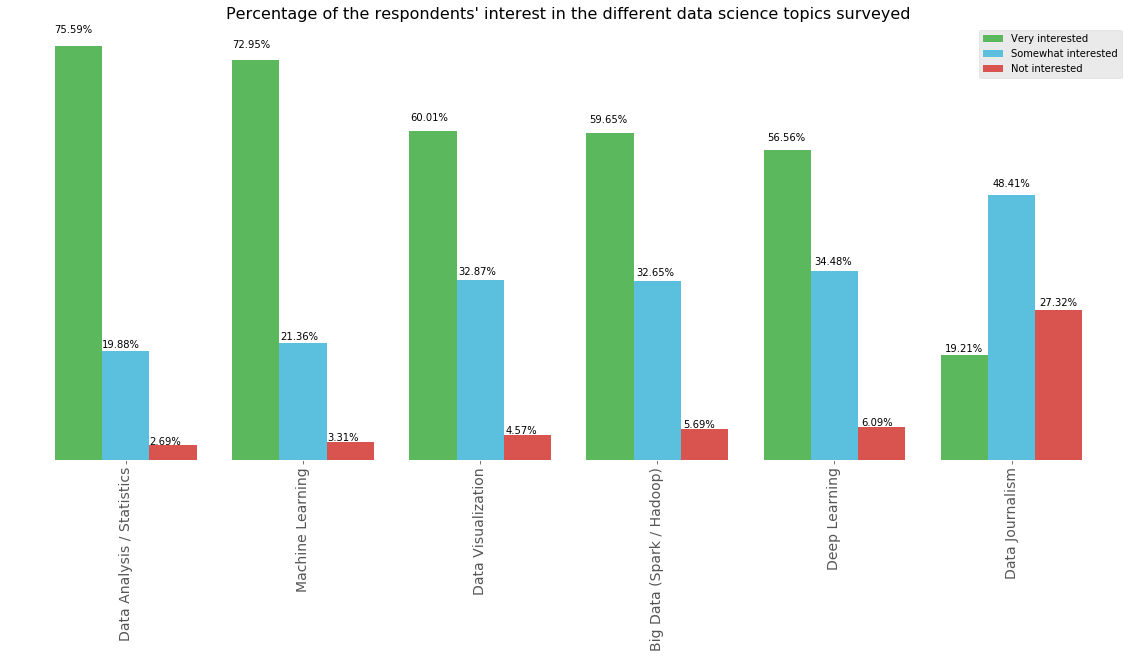

In [14]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')

#Step 1: Sorting data
df.sort_values(['Very interested'], ascending=False, axis= 0, inplace=True)

#step 2: convert to %
df_percentage = ((df/2233)*100).round(2)

ax= df_percentage.plot(kind='bar', figsize=(20,8), width=0.8, color = ['#5cb85c', '#5bc0de', '#d9534f'], fontsize= 14)
plt.title("Percentage of the respondents' interest in the different data science topics surveyed", fontsize= 16)

#removing background color
ax.set_facecolor((1.0, 1.0, 1.0))

#removing y axis
ax.axes.get_yaxis().set_visible(False)

#annotating 
for p in ax.patches:
    ax.annotate(str(p.get_height()) + '%', (p.get_x() * 1.005, p.get_height() * 1.03))

#display % above bars

plt.show()

#### 3) Create a Choropleth map to visualize crime in San Francisco.

San Francisco dataset: https://cocl.us/sanfran_crime_dataset

In [23]:
#Read file
df_sf = pd.read_csv("https://cocl.us/sanfran_crime_dataset")


df_sf.drop(['Category','Descript','DayOfWeek','Date','Time', 'Resolution','Address','X','Y','Location','PdId'], axis=1, inplace=True)


#grouping
df_group= df_sf.groupby(['PdDistrict']).count().reset_index()

#Rename
df_group.rename(columns={'PdDistrict':'Neighborhood', 'IncidntNum':'Count'}, inplace=True)
df_group

,Neighborhood,Count
0,BAYVIEW,14303
1,CENTRAL,17666
2,INGLESIDE,11594
3,MISSION,19503
4,NORTHERN,20100
5,PARK,8699
6,RICHMOND,8922
7,SOUTHERN,28445
8,TARAVAL,11325
9,TENDERLOIN,9942


In [20]:
!wget --quiet https://cocl.us/sanfran_geojson -O sanfran_geo.json 
    
    


SyntaxError: invalid syntax (<ipython-input-20-60cd83a08456>, line 1)

In [29]:
import wget

sf_geo = wget.download('https://cocl.us/sanfran_geojson -O sanfran_geo.json')

In [30]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

Solving environment: done

# All requested packages already installed.



In [32]:
# create a plain San Francisco map
sf_map = folium.Map(location=[37.773972, -122.431297], zoom_start=12) #, tiles='Mapbox Bright')
sf_map.choropleth(
    geo_data=sf_geo,
    data=df_group,
    columns=['Neighborhood','Count'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='San Francisco Crime rate'
)

# display map
sf_map

JSONDecodeError: Expecting value: line 1 column 1 (char 0)